In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Julio Rodriguez's Statcast data
rodriguez = pd.read_csv('2022_rodriguez_julio.csv')

# Load Michael Harris' Statcast data
harris = pd.read_csv('2022_harris_michael.csv')

In [4]:
# Display all columns (pandas will collapse some columns if we don't set this option)
pd.set_option('display.max_columns', None)

# Display the last five rows of the Julio Rodriguez file
rodriguez.tail(n=5)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
2079,FS,2022-04-08,95.0,-1.82,6.25,"Rodríguez, Julio",677594,661395,NaN,foul,NaN,NaN,NaN,NaN,7,Julio Rodriguez called out on strikes.,R,R,R,MIN,SEA,S,NaN,NaN,1,0,2022,-1.27,0.52,-0.61,1.48,NaN,NaN,NaN,0,6,Top,NaN,NaN,NaN,NaN,680777,NaN,NaN,5.971556,-138.075806,-7.958898,-17.633005,28.647796,-24.020136,3.49,1.60,2.0,84.0,-42.0,94.5,1821.0,5.9,661750,661395,680777,593934,593871,570482,621043,666135,621439,596146,54.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,2,Split-Finger,1,2,2,1,2,1,2,1,Strategic,Standard,218.0,0.000,-0.043
2080,SL,2022-04-08,80.4,-2.45,5.18,"Rodríguez, Julio",677594,657746,field_out,hit_into_play,NaN,NaN,NaN,NaN,6,"Julio Rodriguez grounds out softly, catcher Ry...",R,R,R,MIN,SEA,X,2.0,ground_ball,0,0,2022,0.32,-0.04,0.57,2.35,NaN,NaN,NaN,1,2,Top,123.09,199.20,NaN,NaN,680777,NaN,NaN,6.046439,-116.973661,0.422810,1.899941,20.677770,-32.792901,3.49,1.60,1.0,50.3,-64.0,80.1,2148.0,6.0,661750,657746,680777,593934,593871,570482,621043,666135,621439,596146,54.53,0.234,0.218,0.0,1.0,0.0,0.0,1.0,11,1,Slider,0,2,2,0,2,0,2,0,Strategic,Standard,52.0,0.012,-0.156
2081,FS,2022-04-08,92.9,-1.93,6.15,"Rodríguez, Julio",677594,661395,NaN,ball,NaN,NaN,NaN,NaN,13,Julio Rodriguez called out on strikes.,R,R,R,MIN,SEA,B,NaN,NaN,0,0,2022,-1.42,0.38,-0.30,0.65,NaN,NaN,NaN,0,6,Top,NaN,NaN,NaN,NaN,680777,NaN,NaN,7.232206,-134.914445,-9.084247,-18.910761,28.860780,-25.682934,3.24,1.47,NaN,NaN,NaN,92.4,1710.0,6.1,661750,661395,680777,593934,593871,570482,621043,666135,621439,596146,54.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,1,Split-Finger,1,2,2,1,2,1,2,1,Strategic,Standard,219.0,0.000,0.033
2082,SL,2022-04-08,81.4,0.30,5.63,"Rodríguez, Julio",677594,543056,field_out,hit_into_play,NaN,NaN,NaN,NaN,7,Julio Rodriguez lines out to right fielder Max...,R,R,L,MIN,SEA,X,9.0,line_drive,1,0,2022,-0.40,0.47,-0.56,1.96,NaN,NaN,NaN,1,8,Top,187.78,79.37,NaN,NaN,680777,NaN,NaN,-1.164055,-118.482928,-2.480310,-3.515844,24.241673,-27.500016,3.49,1.60,333.0,98.7,22.0,80.4,2367.0,5.8,661750,543056,680777,593934,593871,570482,621043,666135,621439,596146,54.73,0.317,0.391,0.0,1.0,0.0,0.0,5.0,61,2,Slider,1,2,2,1,2,1,2,1,Standard,Standard,299.0,0.016,-0.178
2083,CU,2022-04-08,77.9,-0.19,5.88,"Rodríguez, Julio",677594,543056,NaN,ball,NaN,NaN,NaN,NaN,13,Julio Rodriguez lines out to right fielder Max...,R,R,L,MIN,SEA,B,NaN,NaN,0,0,2022,-0.67,-1.77,-0.36,0.89,NaN,NaN,NaN,1,8,Top,NaN,NaN,NaN,NaN,680777,NaN,NaN,0.864222,-113.415405,-0.492038,-5.910902,23.599317,-47.425042,3.30,1.56,NaN,NaN,NaN,76.9,2664.0,5.8,661750,543056,680777,593934,593871,570482,621043,666135,621439,596146,54.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,1,Curveball,1,2,2,1,2,1,2,1,Standard,Standard,344.0,0.000,0.023


In [5]:
# All of Julio Rodriguez's batted ball events in 2022
rodriguez_events_2022 = rodriguez.loc[rodriguez['game_year'] == 2022].events
print("Julio Rodriguez batted ball event totals, 2022:")
print(rodriguez_events_2022.value_counts())

# All of Michael Harris' batted ball events in 2022
harris_events_2022 = harris.loc[harris['game_year'] == 2022].events
print('Michael Harris batted ball event totals, 2022:')
print(harris_events_2022.value_counts())

Julio Rodriguez batted ball event totals, 2022:
field_out                    194
strikeout                    145
single                        89
walk                          36
home_run                      28
double                        25
force_out                     12
hit_by_pitch                   8
grounded_into_double_play      7
field_error                    7
triple                         3
fielders_choice                1
sac_fly                        1
caught_stealing_2b             1
Name: events, dtype: int64
Michael Harris batted ball event totals, 2022:
field_out                    159
strikeout                    107
single                        74
double                        27
walk                          21
home_run                      19
force_out                     13
grounded_into_double_play      7
hit_by_pitch                   5
triple                         3
field_error                    3
double_play                    2
sac_bunt            

Text(0.5, 1.0, 'Michael Harris\nHome Runs, 2022')

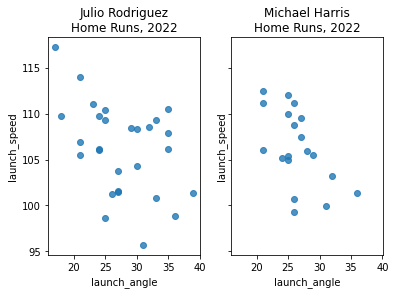

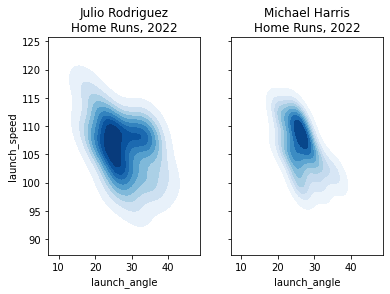

In [6]:
# Filter to include home runs only
rodriguez_hr = rodriguez.loc[rodriguez['events'] == 'home_run']
harris_hr = harris.loc[harris['events'] == 'home_run']

# Create a figure with two scatter plots of launch speed vs. launch angle, one for each player's home runs
fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x='launch_angle', y='launch_speed', fit_reg=False, color='tab:blue', data=rodriguez_hr, ax=axs1[0]).set_title('Julio Rodriguez\nHome Runs, 2022')
sns.regplot(x='launch_angle', y='launch_speed', fit_reg=False, color='tab:blue', data=harris_hr, ax=axs1[1]).set_title('Michael Harris\nHome Runs, 2022')


# Create a figure with two KDE plots of launch speed vs. launch angle, one for each player's home runs

fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(x=rodriguez_hr.launch_angle, y=rodriguez_hr.launch_speed, cmap='Blues', fill=True, thresh=0.05, ax=axs2[0]).set_title('Julio Rodriguez\nHome Runs, 2022')
sns.kdeplot(x=harris_hr.launch_angle, y=harris_hr.launch_speed, cmap='Blues', fill=True, thresh=0.05, ax=axs2[1]).set_title('Michael Harris\nHome Runs, 2022')

Text(0.5, 1.0, 'Home Runs, 2022')

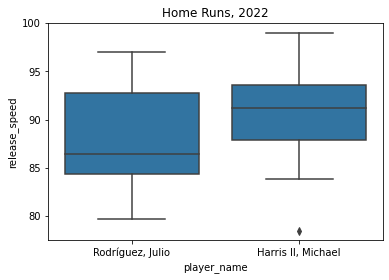

In [7]:
# Combine the Rodriguez and Harris home run DataFrames for easy boxplot plotting
rodriguez_harris_hr = pd.concat([rodriguez_hr, harris_hr])

# Create a boxplot that describes the pitch velocity of each player's home runs

sns.boxplot(x='player_name', y='release_speed', color='tab:blue', data=rodriguez_harris_hr).set_title('Home Runs, 2022')

In [8]:
def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        return 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        return 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        return 3

In [9]:
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        return 3
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        return 2
    # Lower third of strike zone
    if row.zone in [7, 8, 9]:
        return 1

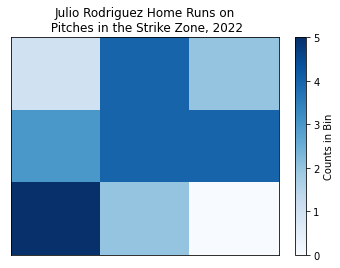

In [10]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
rodriguez_strike_hr = rodriguez_hr.copy().loc[rodriguez_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Rodriguez home runs
rodriguez_strike_hr['zone_x'] = rodriguez_strike_hr.apply(assign_x_coord, axis=1)
rodriguez_strike_hr['zone_y'] = rodriguez_strike_hr.apply(assign_y_coord, axis=1)

# Plot Rodriguez's home run zone as a 2D histogram with a colorbar
plt.hist2d(rodriguez_strike_hr.zone_x, rodriguez_strike_hr.zone_y, bins = 3, cmap='Blues')
plt.title('Julio Rodriguez Home Runs on\n Pitches in the Strike Zone, 2022')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

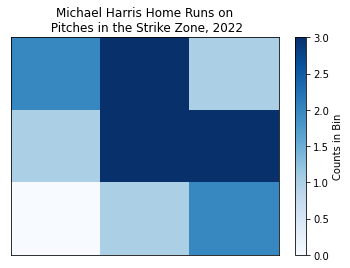

In [11]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
harris_strike_hr = harris_hr.copy().loc[harris_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Harris home runs
harris_strike_hr['zone_x'] = harris_strike_hr.apply(assign_x_coord, axis=1)
harris_strike_hr['zone_y'] = harris_strike_hr.apply(assign_y_coord, axis=1)

# Plot Harris' home run zone as a 2D histogram with a colorbar
plt.hist2d(harris_strike_hr.zone_x, harris_strike_hr.zone_y, bins = 3, cmap='Blues')
plt.title('Michael Harris Home Runs on\n Pitches in the Strike Zone, 2022')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')